# Tutorial of SO HK data IO

__Example__ <br>
Reading : https://so3g.readthedocs.io/en/latest/hk.html#reading-hk-data <br>
Writing : https://so3g.readthedocs.io/en/latest/hk.html#writing-hk-data <br>

## Simple IO example 

### Import libraries
Need to import so3g only for analysis using HK data

In [203]:
import numpy as np
import datetime as dt
import time as tm
import scipy.interpolate
import matplotlib.pyplot as plt
import so3g
from spt3g import core

### load data from time range
* Just by specifying a timestamp range, you can automatically read the split-saved data.　<br>
* Specifying a long time range is very time consuming and memory intensive. <br>
* Even if a short time range, it is time consuming if there are many HK g3 files in archive folder. <br>
* In that case, we recommend to copy the necessary g3 files into your own archive folder. <br>
* Also specifying parameter fields as described below is encouraged to save loading time.

In [190]:
# P6R1 UCSD HK data with arbitary time range
start = dt.datetime(2021, 3, 2, 23, 43, 38, 691036).timestamp()
end =  dt.datetime(2021, 3, 3, 1, 44, 13, 240540).timestamp()
archive_path = '/mnt/so1/data/ucsd-sat1/hk'
# load housekeeping data 
print('loading HK data files ...')
data = so3g.hk.load_range(start, end, data_dir=archive_path)

loading HK data files ...


In [192]:
data_T = []
label = []
keys = []
for k in data.keys(): 
    print(k)
    if 'temperatures' not in str(k): continue
    if '_R' in str(k): continue
    if '_V' in str(k): continue
    if not 'LSA24LY' in str(k): continue
    data_T.append(data[k])
    keys.append(k)

observatory.boresite-labjack.feeds.sensors.AIN72V
observatory.boresite-labjack.feeds.sensors.AIN73V
observatory.boresite-labjack.feeds.sensors.AIN74C
observatory.boresite-labjack.feeds.sensors.AIN74V
observatory.boresite-labjack.feeds.sensors.AIN75V
observatory.boresite-labjack.feeds.sensors.AIN76V
observatory.boresite-labjack.feeds.sensors.AIN77V
observatory.boresite-labjack.feeds.sensors.AIN78V
observatory.boresite-labjack.feeds.sensors.AIN79V
observatory.boresite-labjack.feeds.sensors.AIN80V
observatory.boresite-labjack.feeds.sensors.AIN81V
observatory.boresite-labjack.feeds.sensors.AIN82V
observatory.boresite-labjack.feeds.sensors.AIN83V
observatory.boresite-labjack.feeds.sensors.AIN84V
observatory.boresite-labjack.feeds.sensors.AIN85V
observatory.boresite-labjack.feeds.sensors.AIN86V
observatory.boresite-labjack.feeds.sensors_downsampled.AIN72V
observatory.boresite-labjack.feeds.sensors_downsampled.AIN73V
observatory.boresite-labjack.feeds.sensors_downsampled.AIN74C
observatory.bo

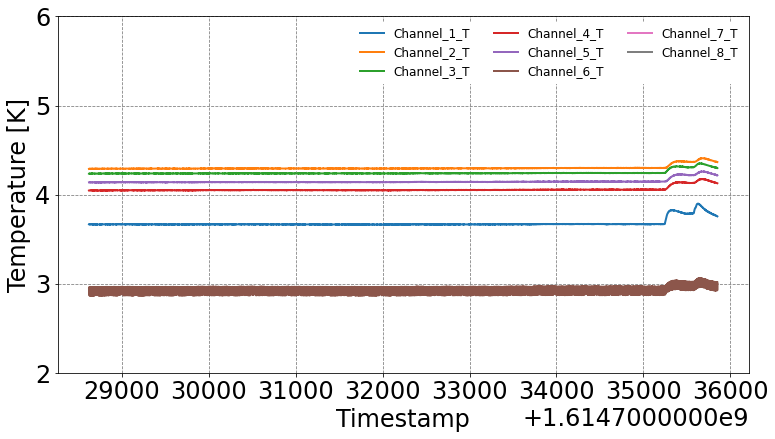

In [193]:
plt.figure(figsize=(12,6))
plt.xlabel('Timestamp')
plt.ylabel('Temperature [K]')
for i in range(len(data_T)): 
    label = keys[i].replace('observatory.LSA24LY.feeds.temperatures.','')
    plt.plot(data_T[i][0],data_T[i][1],lw=2,label = label)
plt.ylim(2,6)
plt.legend(loc=1,fontsize=12,ncol=3)
plt.show()

__Master table of thermometors in P6R1__ <br>
https://simons1.princeton.edu/confluence/display/UCSDS1/P6R1%3A+Thermometry+Setup <br>
* We need to be in close contact with the lab. people to share information or always ask to keep careful logs.
* How about TSAT??

### load data with specified fileds and alias

[LS224 name]-[ch] <br>
__SPB thermometer__: LSA21YC-3 
(SPB = Single Pixel Box) <br>
__CHWP YBCO thermometer__: LSA23NV-7 <br>

In [194]:
keys=['observatory.LSA24LY.feeds.temperatures.Channel_' + str(n) + '_T' for n in range(1,9)]
alias=[key.split('.')[-1] for key in keys]
print(keys,alias)

['observatory.LSA24LY.feeds.temperatures.Channel_1_T', 'observatory.LSA24LY.feeds.temperatures.Channel_2_T', 'observatory.LSA24LY.feeds.temperatures.Channel_3_T', 'observatory.LSA24LY.feeds.temperatures.Channel_4_T', 'observatory.LSA24LY.feeds.temperatures.Channel_5_T', 'observatory.LSA24LY.feeds.temperatures.Channel_6_T', 'observatory.LSA24LY.feeds.temperatures.Channel_7_T', 'observatory.LSA24LY.feeds.temperatures.Channel_8_T'] ['Channel_1_T', 'Channel_2_T', 'Channel_3_T', 'Channel_4_T', 'Channel_5_T', 'Channel_6_T', 'Channel_7_T', 'Channel_8_T']


In [195]:
data = so3g.hk.load_range(start, end, fields=keys, alias=alias, data_dir=archive_path)

In [196]:
data

{'Channel_1_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([3.6661, 3.6651, 3.6653, ..., 3.7578, 3.7566, 3.7559])),
 'Channel_2_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([4.2885, 4.2887, 4.2904, ..., 4.3658, 4.3656, 4.3653])),
 'Channel_3_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([4.2355, 4.2368, 4.2363, ..., 4.2996, 4.2998, 4.2988])),
 'Channel_4_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([4.0468, 4.0473, 4.0472, ..., 4.1287, 4.128 , 4.1278])),
 'Channel_5_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([4.1375, 4.1379, 4.1381, ..., 4.2165, 4.2165, 4.2171

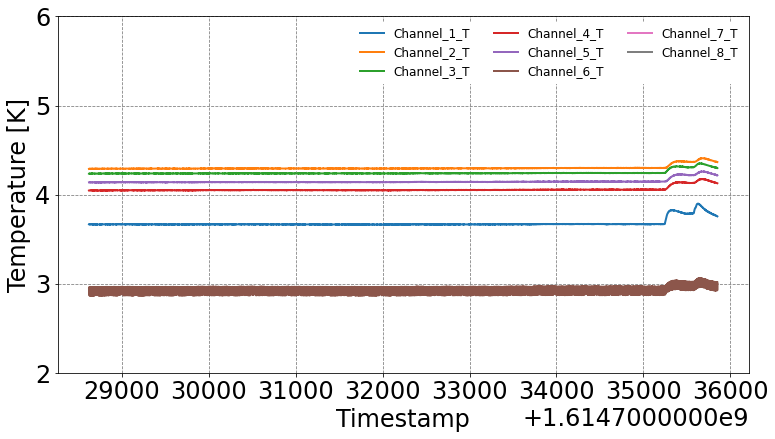

In [197]:
plt.figure(figsize=(12,6))
plt.xlabel('Timestamp')
plt.ylabel('Temperature [K]')
for i in range(len(data_T)): 
    plt.plot(data[alias[i]][0],data[alias[i]][1],lw=2,label = alias[i])
plt.ylim(2,6)
plt.legend(loc=1,fontsize=12,ncol=3)
plt.show()

### load data from file name

In [198]:
path = '/mnt/so1/data/ucsd-sat1/hk/16147/'# absolute path, not archive path
filename = ['1614728653.g3','1614732258.g3']# g3 filename
keys=['observatory.LSA24LY.feeds.temperatures.Channel_' + str(n) + '_T' for n in range(1,9)]
alias=[key.split('.')[-1] for key in keys]

In [199]:
# load housekeeping files with keys
scanner = so3g.hk.HKArchiveScanner()
if isinstance(filename, list) or isinstance(filename, np.ndarray):
    for f in filename: scanner.process_file(path + '/' + f)
else: scanner.process_file(path + '/' + filename)
arc = scanner.finalize()

for i in range(len(keys)):
    if not keys[i] in arc.get_fields()[0].keys():
        raise ValueError('HWP is not spinning in this file!')

data_raw = arc.simple(keys)
data = {alias[0]: data_raw[0]}
for i in range(1,len(data_raw)): data = {**data,**{alias[i]: data_raw[i]}}

In [200]:
data

{'Channel_1_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([3.6656, 3.6661, 3.6651, ..., 3.7578, 3.7566, 3.7559])),
 'Channel_2_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([4.2894, 4.2885, 4.2887, ..., 4.3658, 4.3656, 4.3653])),
 'Channel_3_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([4.2363, 4.2355, 4.2368, ..., 4.2996, 4.2998, 4.2988])),
 'Channel_4_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([4.0469, 4.0468, 4.0473, ..., 4.1287, 4.128 , 4.1278])),
 'Channel_5_T': (array([1.61472862e+09, 1.61472862e+09, 1.61472862e+09, ...,
         1.61473585e+09, 1.61473585e+09, 1.61473585e+09]),
  array([4.1376, 4.1375, 4.1379, ..., 4.2165, 4.2165, 4.2171

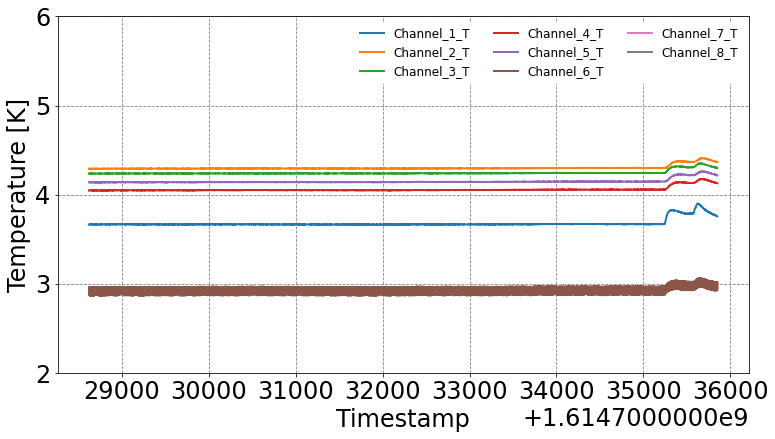

In [201]:
plt.figure(figsize=(12,6))
plt.xlabel('Timestamp')
plt.ylabel('Temperature [K]')
for i in range(len(data_T)): 
    plt.plot(data[alias[i]][0],data[alias[i]][1],lw=2,label = alias[i])
plt.ylim(2,6)
plt.legend(loc=1,fontsize=12,ncol=3)
plt.show()

### Output SO HK g3 file
The so3g.hk module provides limited assistance with creating HK data files. The so3g.hk.HKSessionHelper may be used to produce template frames that can be used as a basis for an HK data stream.  <br>However, the code in this module does not enforce validity. (The OCS “aggregator” Agent has more sophisticated logic to help write only valid HK frame streams.)

In [320]:
# Start a "Session" to help generate template frames.
session = so3g.hk.HKSessionHelper(hkagg_version=2)

# Create an output file and write the initial "session" frame.  If you break the data into multiple files, you write the session frame at the start of each file.
writer = core.G3Writer('output.g3')
writer.Process(session.session_frame())

# Create a new data "provider".  This represents a single data source, sending data for some fixed list of fields.
prov_id = session.add_provider('thermometor')

# Whenever there is a change in the active "providers", write a "status" frame.
writer.Process(session.status_frame())

# Construct a "block", which is a named G3TimesampleMap.
block = core.G3TimesampleMap()

# Add block time
block.times = core.G3VectorTime([core.G3Time(_t * core.G3Units.s) for _t in data[alias[0]][0]])
# Add parameters to block
for i in range(len(data)): 
    block[alias[i]] = core.G3VectorDouble(data[alias[i]][1])


# Create an output data frame template associated with this provider.
frame = session.data_frame(prov_id)

# Add the block and block name to the frame, and write it.
frame['block_names'].append('thermometer')
frame['blocks'].append(block)

In [319]:
print(frame.keys())
print(frame['timestamp'])
print(frame['block_names'])
print(frame['prov_id'])
print(frame['blocks'][0])
print(frame['blocks'][0].keys())
print(frame['blocks'][0]['Channel_1_T'])

['block_names', 'blocks', 'prov_id', 'session_id', 'hkagg_type', 'timestamp', 'hkagg_version']
1650604249.8087173
[thermometer]
0
<co-sampled vectors with 11520 samples>{Channel_1_T, Channel_2_T, Channel_3_T, Channel_4_T, Channel_5_T, Channel_6_T, Channel_7_T, Channel_8_T}
['Channel_1_T', 'Channel_2_T', 'Channel_3_T', 'Channel_4_T', 'Channel_5_T', 'Channel_6_T', 'Channel_7_T', 'Channel_8_T']
11520 elements


In [302]:
writer.Process(frame)

### Loading output g3 file

In [305]:
scanner = so3g.hk.HKArchiveScanner()
scanner.process_file('output.g3')
#arc = scanner.finalize()
#print(arc.get_data()[0].keys())

ERROR (G3IndexedReader): Exception raised while reading file output.g3 (G3IndexedReader.cxx:84 in virtual void G3IndexedReader::Process(G3FramePtr, std::deque<boost::shared_ptr<G3Frame> >&))


RuntimeError: Failed to read 38 bytes from input stream! Read 27

## P9R1 cooldown plot
* Let's make P9R1 cooldown plot for practice <br>
* time range can be find in wiki or grafana <br>
__P9R1 wiki page__: <br>
https://simons1.princeton.edu/confluence/pages/viewpage.action?pageId=20555865 <br>
__UCSD Grafana__: <br>
https://sat.cosmology.ucsd.edu/grafana/d/tBP3dq6Mk/p9r1-4k-and-40k?orgId=1&from=1623322800000&to=1624287599000 <br>
grafana info. in UCSD <br>
https://simons1.princeton.edu/confluence/display/UCSDS1/P6R1+CHWP+Testing

In [146]:
# UCSD P9R1 HK data
start = dt.datetime(2021, 6, 11, 0, 0, 0, 0).timestamp()
end =  dt.datetime(2021, 6, 20, 0, 0, 0, 0).timestamp()
archive_path = '/mnt/so1/data/ucsd-sat1/hk'

__P9R1 Thermometer Master Table__: <br>
https://simons1.princeton.edu/confluence/display/UCSDS1/P9R1%3A+Thermometry+Setup <br>
CHWP YBCO: LSA2619-7 <br> 
OT stop: LSA24M5-2 <br>
OT lens1: LSA24M5-3 <br>
OT lens2: LSA24M5-5 <br>
SPB: LSA21YC-3 <br>

In [164]:
keys=['observatory.LSA2619.feeds.temperatures.Channel_5_T',
      'observatory.LSA24M5.feeds.temperatures.Channel_2_T',
      'observatory.LSA24M5.feeds.temperatures.Channel_3_T',
      'observatory.LSA21YC.feeds.temperatures.Channel_03_T',]
alias = ['40K_filter','OT_stop','OT_lens1','SPB',]

In [165]:
data = so3g.hk.load_range(start, end, fields=keys, alias=alias, data_dir=archive_path)

In [166]:
data

{'40K_filter': (array([1.6233696e+09, 1.6233696e+09, 1.6233696e+09, ..., 1.6241472e+09,
         1.6241472e+09, 1.6241472e+09]),
  array([273.17 , 273.16 , 273.17 , ...,  57.477,  57.461,  57.464])),
 'OT_stop': (array([1.6233696e+09, 1.6233696e+09, 1.6233696e+09, ..., 1.6241472e+09,
         1.6241472e+09, 1.6241472e+09]),
  array([280.31  , 280.17  , 280.19  , ...,   6.6127,   6.6124,   6.6122])),
 'OT_lens1': (array([1.6233696e+09, 1.6233696e+09, 1.6233696e+09, ..., 1.6241472e+09,
         1.6241472e+09, 1.6241472e+09]),
  array([266.79  , 266.85  , 266.61  , ...,   6.4284,   6.4285,   6.4283])),
 'SPB': (array([1.62336963e+09, 1.62336963e+09, 1.62336966e+09, ...,
         1.62414717e+09, 1.62414717e+09, 1.62414720e+09]),
  array([292.477  , 292.499  , 292.418  , ...,   6.08153,   6.08253,
           6.0842 ]))}

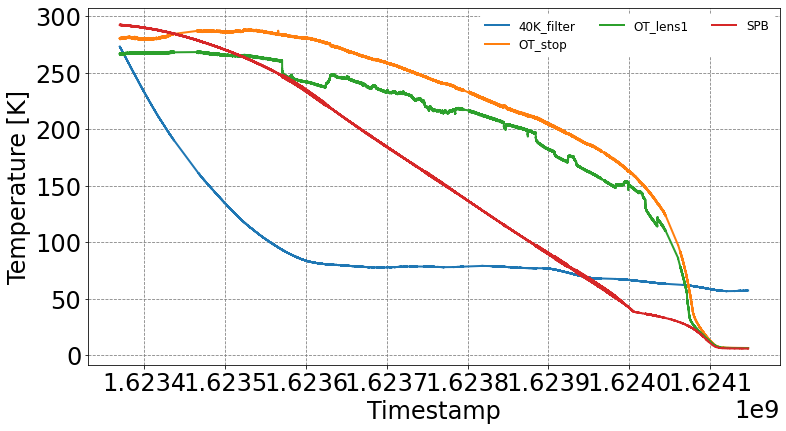

In [167]:
plt.figure(figsize=(12,6))
plt.xlabel('Timestamp')
plt.ylabel('Temperature [K]')
for i in range(len(data)): 
    plt.plot(data[alias[i]][0],data[alias[i]][1],lw=2,label = alias[i])
plt.legend(loc=1,fontsize=12,ncol=3)
plt.show()